# Deep Learning (CNN)

---

## Brain MRI Tumor Detection

This is kaggle dataset of Brain tumor types, Our task is to build network to classify the tumor types or no tumor so that the patient get proper treatment on time and their life expectancy improve.

**Required Tools**

    - Numpy
    - Matplotlib
    - Tensorflow 2
    - keras
    
**Architecture**

    - Load Dataset
    - Plot Images
    - Make train test Split
    - Data Augmentation
    - Model Build
    - Model Compile
    - Train Model
    - Check Model Performance
    
**[Dataset](https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri)**

---
    
## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import models, layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
IMG_SIZE = 256
BATCH_SIZE = 30
EPOCHS = 50
CHANNEL = 3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/My Data Science Stuff/Kaggle/Brain Tumor/archive/Training',
    shuffle=True,
    image_size= (IMG_SIZE, IMG_SIZE),
    batch_size= BATCH_SIZE
)

Found 2870 files belonging to 4 classes.


In [5]:
class_name = dataset.class_names
class_name

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [6]:
len(dataset)

96

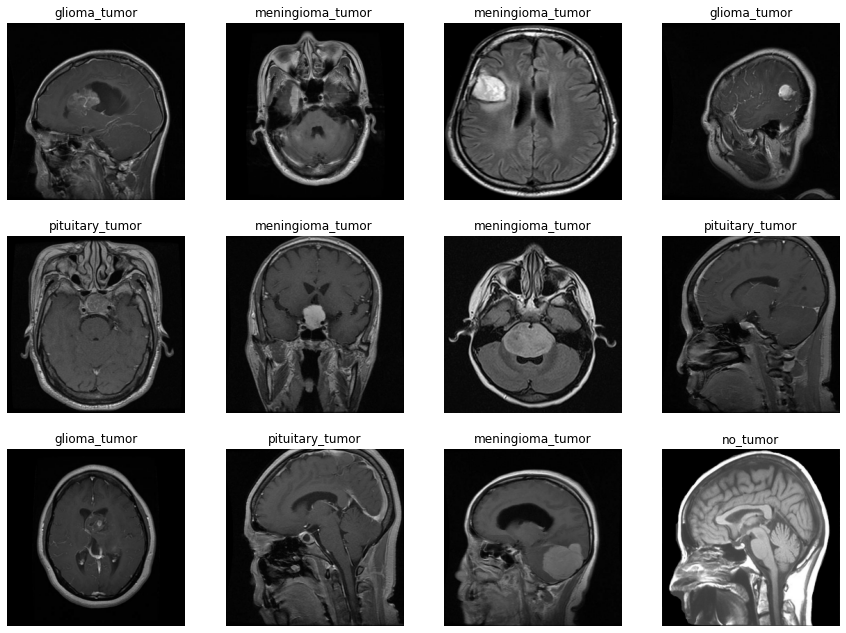

In [7]:
plt.figure(figsize=(15,15))
for img, lbl in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(img[i].numpy().astype(np.int32))
        plt.title(class_name[lbl[i]])
        plt.axis('off')

In [8]:
def data_partition(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=17)
        
    train_size = int(ds_size*train_split)
    val_size = int(ds_size*val_split)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    
    return train_ds, val_ds

In [9]:
train_ds, val_ds = data_partition(dataset)

In [10]:
print(len(train_ds))
print(len(val_ds))

76
19


In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/My Data Science Stuff/Kaggle/Brain Tumor/archive/Testing',
    shuffle= True,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 394 files belonging to 4 classes.


In [12]:
class_namet = test_ds.class_names
class_namet

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [13]:
len(test_ds)

14

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255)
])

In [16]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [17]:
inp_shape = (BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNEL)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', padding="VALID", input_shape = inp_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding="VALID"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding="VALID"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding="VALID"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding="VALID"),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3), activation='relu', padding="VALID"),
    layers.MaxPooling2D((2,2)),
    
    layers.Dense(units=100, activation='relu'),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(units=40, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape = inp_shape)

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
records = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1
)

Epoch 1/50
76/76 [==============================] - 16s 116ms/step - loss: 1.3067 - accuracy: 0.3520 - val_loss: 1.1800 - val_accuracy: 0.4632
Epoch 2/50
76/76 [==============================] - 4s 53ms/step - loss: 1.1007 - accuracy: 0.5247 - val_loss: 0.9974 - val_accuracy: 0.5649
Epoch 3/50
76/76 [==============================] - 4s 53ms/step - loss: 1.0278 - accuracy: 0.5568 - val_loss: 0.9181 - val_accuracy: 0.6263
Epoch 4/50
76/76 [==============================] - 4s 53ms/step - loss: 0.9383 - accuracy: 0.6018 - val_loss: 0.8378 - val_accuracy: 0.6386
Epoch 5/50
76/76 [==============================] - 4s 53ms/step - loss: 0.8723 - accuracy: 0.6216 - val_loss: 0.7872 - val_accuracy: 0.6368
Epoch 6/50
76/76 [==============================] - 4s 53ms/step - loss: 0.7949 - accuracy: 0.6559 - val_loss: 0.7767 - val_accuracy: 0.6491
Epoch 7/50
76/76 [==============================] - 4s 53ms/step - loss: 0.7449 - accuracy: 0.6850 - val_loss: 0.7073 - val_accuracy: 0.6860
Epoch 8/50


In [20]:
score = model.evaluate(test_ds)

14/14 [==============================] - 1s 27ms/step - loss: 3.1280 - accuracy: 0.6523


In [21]:
score

[3.12797212600708, 0.6522842645645142]

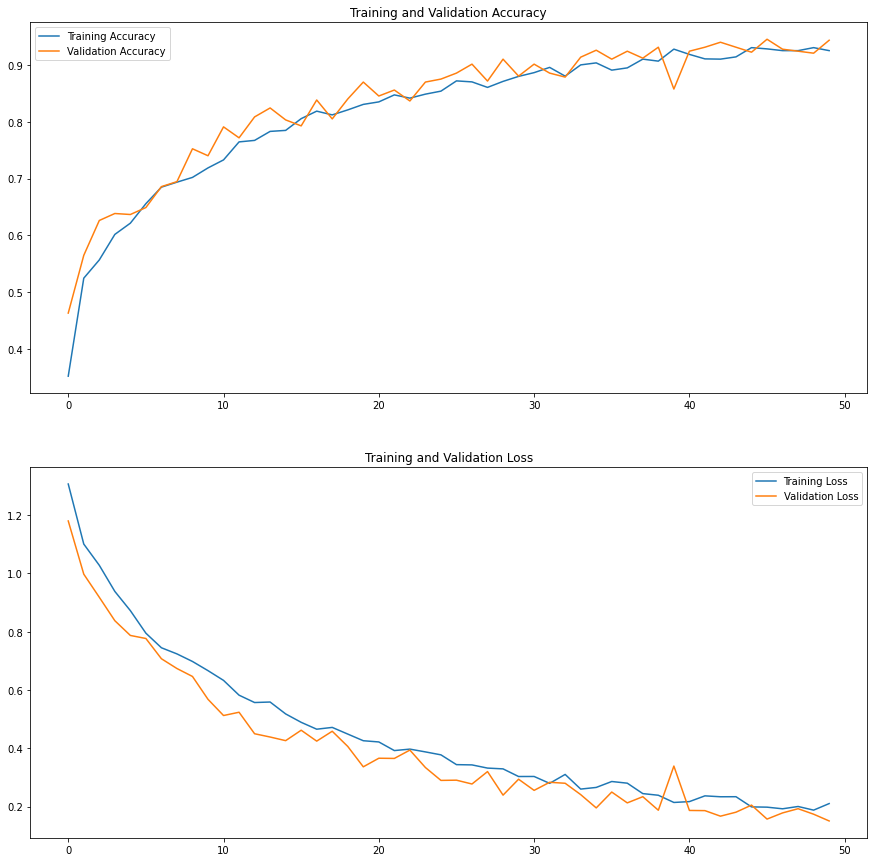

In [22]:
acc = records.history['accuracy']
val_acc = records.history['val_accuracy']

loss = records.history['loss']
val_loss = records.history['val_loss']

plt.figure(figsize=(15,15))
plt.subplot(2,1,1);
plt.plot(range(EPOCHS), acc, label='Training Accuracy');
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy');
plt.legend();
plt.title('Training and Validation Accuracy');

plt.subplot(2,1,2);
plt.plot(range(EPOCHS), loss, label='Training Loss');
plt.plot(range(EPOCHS), val_loss, label='Validation Loss');
plt.legend();
plt.title('Training and Validation Loss');


First Image to Predict
Actual Label:  glioma_tumor
Pridected Label:  meningioma_tumor


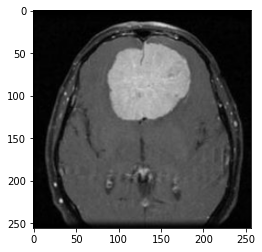

In [23]:
for img_t, lab in test_ds.take(1):

  first_image = img_t[0].numpy().astype(np.int32)
  first_label = lab[0].numpy()

  print("First Image to Predict")
  plt.imshow(first_image)
  print("Actual Label: ", class_namet[first_label])


  batch_pridiction = model.predict(img_t)
  print("Pridected Label: ", class_namet[np.argmax(batch_pridiction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

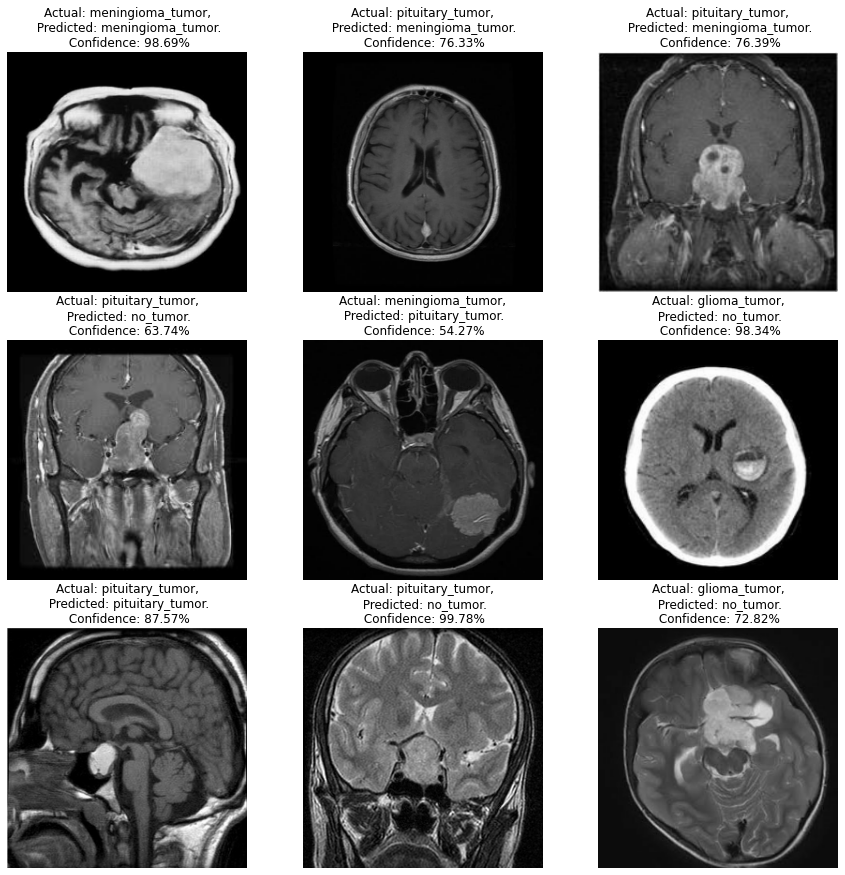

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype(np.int32))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")